# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(10)

#### Import experiment data 

In [3]:
from DATA import NARMA10

data = NARMA10(True, [80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [4]:
N_UNITS = 250

In [5]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.9, ro_rescale=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

In [6]:
simple_reservoir.max_eigs()

tensor(0.2500)

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [7]:
ip_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.normalMask(N_UNITS), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

Check the prior data distribution.

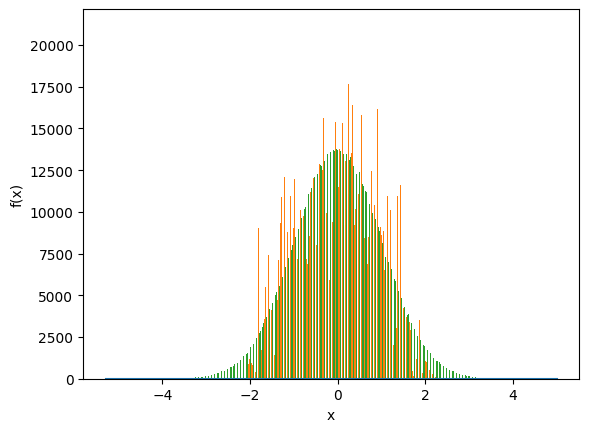

In [8]:
ip_reservoir.pre_train(X_TR, 0, 0)
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

With a large number of units, low spectral radius and a high sparsity, reservoir is more or less already Gaussian.

In [9]:
ip_reservoir.pre_train(X_TR, eta=0.00005, epochs=15,  learning_rule="online", verbose=True) #16

No transient applied. Reservoir was already warmed up


- Epoch: 1) | KL Divergence value: 2682.349853515625.
- Epoch: 2) | KL Divergence value: 2499.455810546875.
- Epoch: 3) | KL Divergence value: 2331.41015625.
- Epoch: 4) | KL Divergence value: 2182.79248046875.
- Epoch: 5) | KL Divergence value: 2054.57958984375.
- Epoch: 6) | KL Divergence value: 1948.341064453125.
- Epoch: 7) | KL Divergence value: 1865.1824951171875.
- Epoch: 8) | KL Divergence value: 1803.3170166015625.
- Epoch: 9) | KL Divergence value: 1758.774658203125.
- Epoch: 10) | KL Divergence value: 1727.460693359375.
- Epoch: 11) | KL Divergence value: 1706.6485595703125.
- Epoch: 12) | KL Divergence value: 1695.4200439453125.
- Epoch: 13) | KL Divergence value: 1693.593505859375.
- Epoch: 14) | KL Divergence value: 1700.4375.
- Epoch: 15) | KL Divergence value: 1714.8712158203125.


In [10]:
print(f"Spectral radius - initial: { ip_reservoir.max_eigs(scaled = False)} - final: {ip_reservoir.max_eigs()} ")

Spectral radius - initial: 0.2500006854534149 - final: 0.8173559904098511 


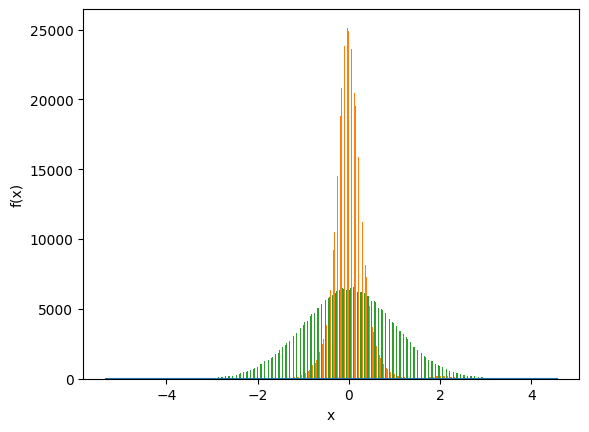

In [11]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.sample_targets(X_TR.shape[0], overwrite=True)
ip_reservoir.plot_global_neural_activity()

In [12]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-0.09722341597080231)  ACTUAL_STD == (0.3495290279388428)][ TARGET_MEAN == (0.006727264262735844) TARGET_STD == (0.9975139498710632)]
Unit - (2): [ ACTUAL_MEAN == (-0.1879499852657318)  ACTUAL_STD == (0.23828746378421783)][ TARGET_MEAN == (-0.0045396569184958935) TARGET_STD == (1.0003677606582642)]
Overall network: [ACTUAL_MEAN == (0.01543321181088686)  ACTUAL_STD == (0.35811614990234375)]


In [13]:
ip_reservoir.max_eigs()

tensor(0.8174)

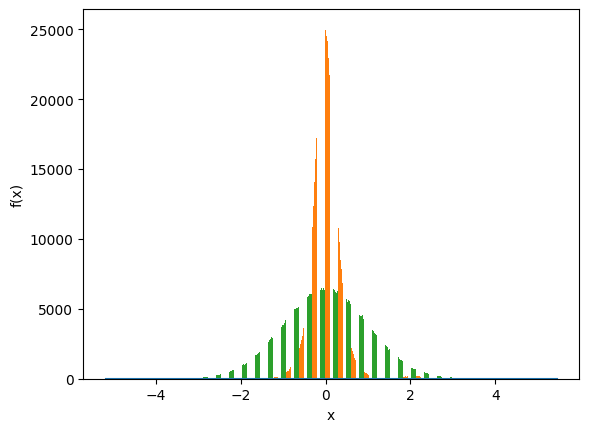

In [14]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.sample_targets(X_TR.shape[0], overwrite=True)
ip_reservoir.plot_global_neural_activity()

In [15]:
ip_reservoir.rescale_weights(0.98)

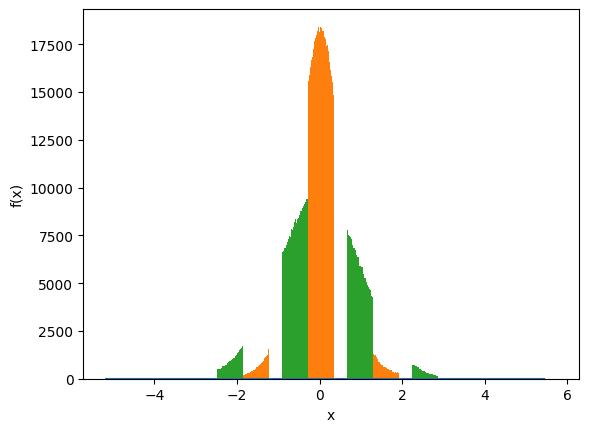

In [16]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

## BIMODAL MIXTURE OF GAUSSIAN

In [17]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 

bimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.mixedBimodalMask(N_UNITS), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
#bimodal_reservoir.b_x = b_x
#bimodal_reservoir.b_u = b_u

In [18]:
bimodal_reservoir.pre_train(X_TR, eta= 0.0000025, epochs=20,  learning_rule="online", verbose=True)

- Epoch: 1) | KL Divergence value: 3556.65673828125.
- Epoch: 2) | KL Divergence value: 3293.463623046875.
- Epoch: 3) | KL Divergence value: 3052.377197265625.
- Epoch: 4) | KL Divergence value: 2835.218017578125.
- Epoch: 5) | KL Divergence value: 2642.7216796875.
- Epoch: 6) | KL Divergence value: 2474.677734375.
- Epoch: 7) | KL Divergence value: 2330.111328125.
- Epoch: 8) | KL Divergence value: 2207.521240234375.
- Epoch: 9) | KL Divergence value: 2105.059326171875.
- Epoch: 10) | KL Divergence value: 2020.76416015625.
- Epoch: 11) | KL Divergence value: 1952.7314453125.
- Epoch: 12) | KL Divergence value: 1899.269287109375.
- Epoch: 13) | KL Divergence value: 1859.0147705078125.
- Epoch: 14) | KL Divergence value: 1831.0450439453125.
- Epoch: 15) | KL Divergence value: 1815.0042724609375.
- Epoch: 16) | KL Divergence value: 1811.28662109375.
- Epoch: 17) | KL Divergence value: 1821.383544921875.
- Epoch: 18) | KL Divergence value: 1848.646728515625.
- Epoch: 19) | KL Divergence 

In [19]:
print(f"Spectral radius - initial: { bimodal_reservoir.max_eigs(scaled = False)} - final: {bimodal_reservoir.max_eigs()} ")

Spectral radius - initial: 0.2500006854534149 - final: 0.5494412183761597 


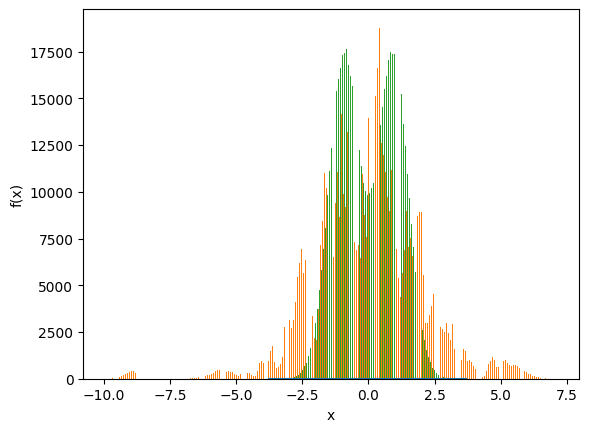

In [20]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [21]:
bimodal_reservoir.max_eigs()

tensor(0.5494)

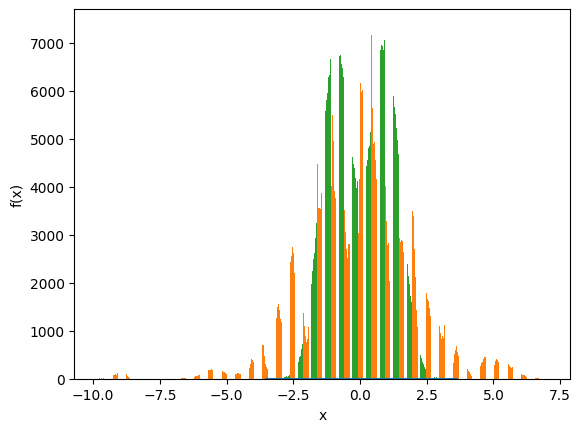

In [22]:
bimodal_reservoir.predict(X_TS, save_gradients=False, save_states=True)
bimodal_reservoir.sample_targets(X_TS.shape[0], overwrite=True)
bimodal_reservoir.plot_global_neural_activity()

In [23]:
bimodal_reservoir.print_IP_stats([0,1,4,7,8,9])

Unit - (1): [ ACTUAL_MEAN == (-2.429980516433716)  ACTUAL_STD == (0.2563296854496002)][ TARGET_MEAN == (-0.8972610235214233) TARGET_STD == (0.5722618103027344)]
Unit - (2): [ ACTUAL_MEAN == (0.589421808719635)  ACTUAL_STD == (0.0729992613196373)][ TARGET_MEAN == (0.9000610113143921) TARGET_STD == (0.5952979922294617)]
Unit - (5): [ ACTUAL_MEAN == (-2.454861640930176)  ACTUAL_STD == (0.26403099298477173)][ TARGET_MEAN == (-0.9100800156593323) TARGET_STD == (0.5872310400009155)]
Unit - (8): [ ACTUAL_MEAN == (0.4031343460083008)  ACTUAL_STD == (0.049900662153959274)][ TARGET_MEAN == (0.9237197637557983) TARGET_STD == (0.5771090388298035)]
Unit - (9): [ ACTUAL_MEAN == (-2.5320212841033936)  ACTUAL_STD == (0.08162617683410645)][ TARGET_MEAN == (-0.9283403158187866) TARGET_STD == (0.5725226402282715)]
Unit - (10): [ ACTUAL_MEAN == (0.51690274477005)  ACTUAL_STD == (0.12320810556411743)][ TARGET_MEAN == (0.9456171989440918) TARGET_STD == (0.5681649446487427)]
Overall network: [ACTUAL_MEAN == 

## EVAUALTUION IN ESN

In [24]:
from ESN import EchoStateNetwork

simple_reservoir.rescale_weights(0.96)
simple_reservoir.max_eigs()

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

simple_esn.train(X_TR, Y_TR, 0)
ip_esn.train(X_TR, Y_TR, 0)
bimodal_esn.train(X_TR, Y_TR, 0)


Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


array([0.29296875, 0.26953125, 0.23828125, ..., 0.27734375, 0.2890625 ,
       0.234375  ], dtype=float32)

### COMPARISON ON TEST DATA

In [25]:
from Metrics import MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.021902000022614335


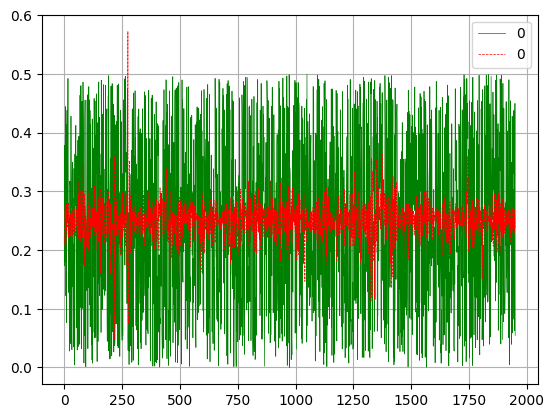

In [26]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS[50:None], Y_TS[50:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022044171274563304


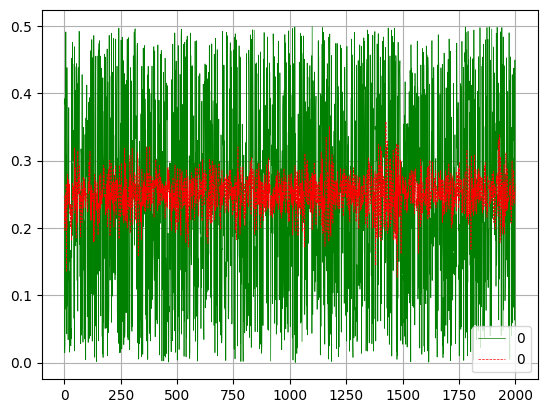

In [27]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02313030418308403


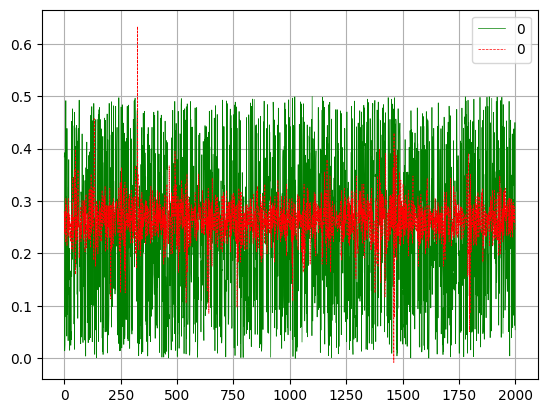

In [28]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

In [29]:
print(f"Spectral radius - initial: { bimodal_esn.reservoir.max_eigs(scaled = False)} - final: {bimodal_esn.reservoir.max_eigs()} ")

Spectral radius - initial: 0.2500006854534149 - final: 0.5494412183761597 


## Lyapunov Exponnet

In [30]:
simple_esn.reservoir.LCE(X_TS)

-0.15981647

In [31]:
ip_esn.reservoir.LCE(X_TS)

-0.38230842

In [32]:
bimodal_esn.reservoir.LCE(X_TS)

-4.0900006

## MEMORY CAPACITY

In [33]:
def mean_mc(esn: EchoStateNetwork, rep):
    mc = 0
    for _ in range(rep):
        mc += esn.MemoryCapacity()

    return mc/rep

In [34]:
mean_mc(simple_esn, 5)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.74938e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.74719e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.7527e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Loc

tensor(10.7679)

In [35]:
mean_mc(ip_esn, 5)

tensor(25.5646)

In [36]:
mean_mc(bimodal_esn, 5)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.76359e-15): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


tensor(13.7745)

## DEVIATION FROM LINEARITY

In [37]:
simple_esn.reservoir.de_fi()

0.07558928391055252

In [38]:
ip_esn.reservoir.de_fi()

0.33866286875413953

In [39]:
bimodal_esn.reservoir.de_fi()

0.11271658036228423